Simula√ß√£o de circuito eletrico

In [1]:
pip install control

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 578.3/578.3 kB 1.1 MB/s eta 0:00:00m eta 0:00:010:00:01
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 35.4/35.4 MB 3.8 MB/s eta 0:00:00m eta 0:00:010:00:01
Note: you may need to restart the kernel to use updated packages.


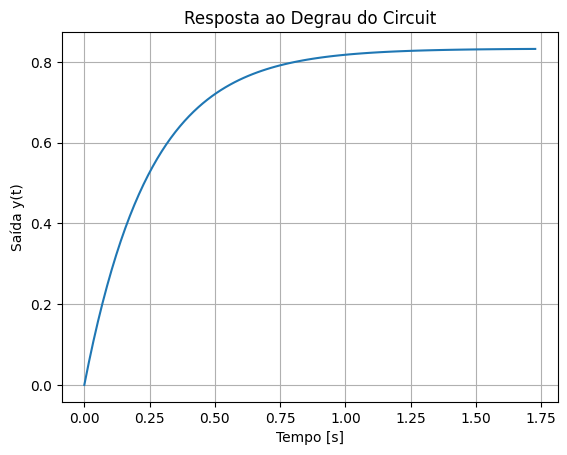

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import control as ct

# Matrizes exemplo
R = 10
Rc = 5
Rl = 2
L = 1
C = 0.1

A = np.array(
    [
        [-(Rc*R + Rc*Rl + Rl*R)/(L*(R+Rc)), -R/(L*(R+Rc))],
        [R/((R+Rc)*C), -1/((R+Rc)*C)]
    ]
)

B = np.array(
    [
        [1/L],
        [0]
    ]
)

Cmat = np.array(
    [
        [R*Rc/(R+Rc), R/(R+Rc)]
    ]
)

D = np.array([[0]])

#cria sistema em espa√ßo de estados
sys = ct.ss(A, B, Cmat, D)

# resposta ao degrau
t, y = ct.step_response(sys)
plt.plot(t, y)
plt.title("Resposta ao Degrau do Circuit")
plt.xlabel("Tempo [s]")
plt.ylabel("Sa√≠da y(t)")
plt.grid(True)
plt.show()

In [4]:
sys_tf = ct.ss2tf(sys)
print(sys_tf)

<TransferFunction>: sys[2]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

  3.333 s + 6.667
  ---------------
   s^2 + 6 s + 8


In [6]:
pip install sympy

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 6.3/6.3 MB 4.0 MB/s eta 0:00:00m eta 0:00:010:00:01
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 536.2/536.2 kB 2.9 MB/s eta 0:00:00m eta 0:00:010:00:01
Note: you may need to restart the kernel to use updated packages.


In [7]:
import sympy as sp

r_l, L, r_c, R, C, s = sp.symbols('r_l L r_c R C s')

A = sp.Matrix([
    [ (-r_c*R + r_c*r_l + r_l*R)/(L*(R + r_c)), -R/(L*(R + r_c)) ],
    [ R/((R + r_c)*C), -1/((R + r_c)*C) ]
])

B = sp.Matrix([[1/L], [0]])

C_mat = sp.Matrix([[R*r_c/(R + r_c), R/(R + r_c)]])

D = sp.Matrix([[0]])

I = sp.eye(2)

inv_mat = (s*I - A).inv()

tf = C_mat * inv_mat * B + D

tf_simplified = sp.simplify(tf[0,0])

tf_simplified

R*(C*r_c*s + 1)/(C*L*R*s**2 + C*L*r_c*s**2 + C*R*r_c*s - C*R*r_l*s - C*r_c*r_l*s + L*s + R - r_l)

PI and PD

In [2]:
pip install matplotlib

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 8.7/8.7 MB 4.7 MB/s eta 0:00:00m eta 0:00:010:00:010m
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 355.2/355.2 kB 6.6 MB/s eta 0:00:000:00:01
  Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5.0/5.0 MB 11.1 MB/s eta 0:00:00m eta 0:00:010:00:01
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1.4/1.4 MB 10.5 MB/s eta 0:00:00m eta 0:00:010:00:01
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 16.9/16.9 MB 6.6 MB/s eta 0:00:000m eta 0:00:010:01:01
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


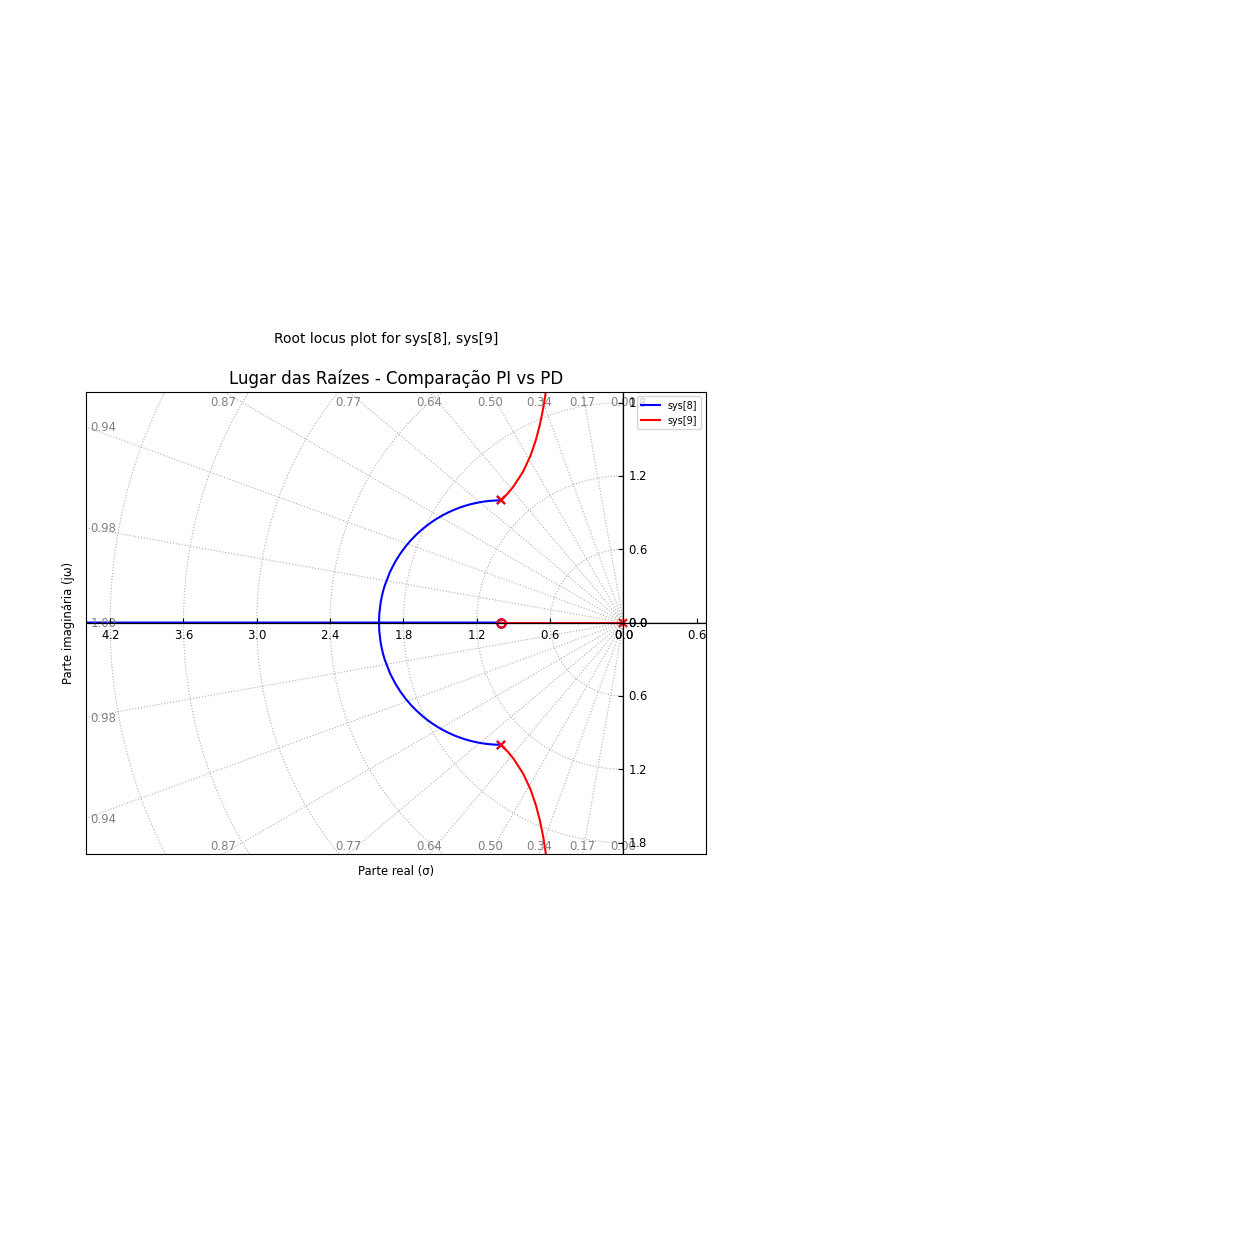

In [6]:
import matplotlib.pyplot as plt
import control as ctl

# Sistema de exemplo: G(s) = 1 / (s^2 + 2s + 2)
G = ctl.TransferFunction([1], [1, 2, 2])

# Controlador PD: C(s) = s+1
C_PD = ctl.TransferFunction([1, 1], [1])

# Controlador PI: C(s) = (s+1)/s
C_PI = ctl.TransferFunction([1, 1], [1, 0])

# Malha aberta
L_PD = C_PD * G
L_PI = C_PI * G

# Plot
plt.figure(figsize=(8,6))
ctl.rlocus(L_PD, color='b')   # PD em azul
ctl.rlocus(L_PI, color='r')   # PI em vermelho

plt.axhline(0, color='black', linewidth=0.8)
plt.axvline(0, color='black', linewidth=0.8)
plt.title("Lugar das Ra√≠zes - Compara√ß√£o PI vs PD")
plt.xlabel("Parte real (œÉ)")
plt.ylabel("Parte imagin√°ria (jœâ)")
plt.grid(True)
plt.show()


# Sistema Original, PI e PD

---

## üëâ Controlador **P**

Forma:

$$
C(s) = K_p
$$

O que ele faz:

1. **N√£o adiciona polos nem zeros.**
2. Apenas **aumenta o ganho do sistema**.
3. Impacto:

   * **Reduz o erro estacion√°rio**, mas **n√£o elimina** (a n√£o ser em sistemas tipo 1).
   * Pode deixar o sistema **mais r√°pido**, mas tamb√©m pode gerar **instabilidade** se o ganho for muito alto.

---

## üëâ Controlador **PD**
* **Com PD** ‚Üí a a√ß√£o **derivativa** acrescenta um **zero** √† fun√ß√£o de transfer√™ncia em malha aberta, o que geralmente ‚Äúpuxa‚Äù os polos dominantes para a **esquerda** (mais est√°veis, resposta mais r√°pida).

Um **controlador proporcional-derivativo** tem a forma:

$$
C(s) = K_p + K_d s = K_p \left(1 + T_d s\right)
$$

O que ele faz:

1. **Adiciona um zero em s = -1/T\_d**

   * Esse zero ‚Äúpuxa‚Äù os polos dominantes **para a esquerda** no lugar das ra√≠zes.
   * Resultado: o sistema responde mais **r√°pido** e com **menor sobre-sinal** (melhora no amortecimento).

2. **N√£o muda a ordem do sistema**

   * Diferente do PI (que adiciona polo na origem), o PD n√£o altera o tipo do sistema.
   * Por isso, **n√£o garante erro estacion√°rio nulo** (se o sistema j√° tinha erro, ele continua).

---

## üëâ Controlador **PI**

Um **controlador proporcional-integral** tem a forma:

$$
C(s) = K_p + \frac{K_i}{s} = K_p\left(1 + \frac{1}{T_i s}\right)
$$

O que ele faz:

1. **Adiciona um polo na origem (s = 0)**

   * Isso aumenta o **tipo do sistema** em 1.
   * Resultado: o erro em regime permanente para entrada **degrau** passa a ser **zero**.

2. **Adiciona tamb√©m um zero em s = -1/T\_i**

   * Esse zero pode compensar parte do efeito de lentid√£o do polo em zero.

---

## üìå Diferen√ßa pr√°tica

* **PD**: foca em **melhorar o transit√≥rio** (mais r√°pido, menos oscilat√≥rio), mas n√£o mexe tanto no erro estacion√°rio.
* **PI**: foca em **melhorar o regime permanente** (erro nulo para degrau), mas pode deixar o transit√≥rio mais lento ou at√© mais oscilat√≥rio.

---

### üîé Intui√ß√£o no lugar das ra√≠zes

* **PD**: desloca polos dominantes **para a esquerda** (acelera).
* **PI**: acrescenta **um polo em 0**, que **atrai parte do lugar das ra√≠zes para perto do eixo imagin√°rio**, ou seja:

  * sistema tende a ficar **mais lento**;
  * mas **ganha precis√£o em regime permanente** (erro nulo para degrau).

---

üëâ Resumindo:

* **PD**: foco em **velocidade/transit√≥rio**.
* **PI**: foco em **erro estacion√°rio/regime permanente**.
* Muitas vezes se combina: **PID** ‚Üí pega o melhor dos dois mundos.

---

## üëâ Controlador **PID (Proporcional-Integral-Derivativo)**

Forma:

$$
C(s) = K_p + \frac{K_i}{s} + K_d s = K_p \left( 1 + \frac{1}{T_i s} + T_d s \right)
$$

O que ele faz:

1. **Adiciona um polo na origem** (do termo integrativo).
2. **Adiciona um zero em $s = -1/T_i$** (do PI).
3. **Adiciona outro zero em $s = -1/T_d$** (do PD).
4. Impacto:

   * **Erro estacion√°rio ‚Üí zero** (gra√ßas ao I).
   * **Resposta mais r√°pida e est√°vel** (gra√ßas ao D).
   * **Ganho proporcional ajusta a velocidade geral**.

---

## üìå Resum√£o comparativo

| Controlador | F√≥rmula                       | Polos/Zeros adicionados                 | Efeito principal                                                                   |
| ----------- | ----------------------------- | --------------------------------------- | ---------------------------------------------------------------------------------- |
| **P**       | $K_p$                         | Nenhum                                  | Ajusta ganho, melhora mas n√£o elimina erro estacion√°rio, pode causar instabilidade |
| **PI**      | $K_p + \frac{K_i}{s}$         | Polo em 0, zero em $-1/T_i$             | Erro estacion√°rio = 0, mas pode piorar transit√≥rio                                 |
| **PD**      | $K_p + K_d s$                 | Zero em $-1/T_d$                        | Melhora transit√≥rio (r√°pido, amortecido), mas erro estacion√°rio n√£o √© eliminado    |
| **PID**     | $K_p + \frac{K_i}{s} + K_d s$ | Polo em 0, zeros em $-1/T_i$ e $-1/T_d$ | Une o melhor dos dois: erro estacion√°rio = 0, resposta r√°pida e amortecida         |

---

üëâ Por isso, muitas vezes se junta os dois: **PID**.

* O **P** d√° ganho.
* O **I** elimina erro estacion√°rio.
* O **D** acelera e amortece o sistema.

---

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


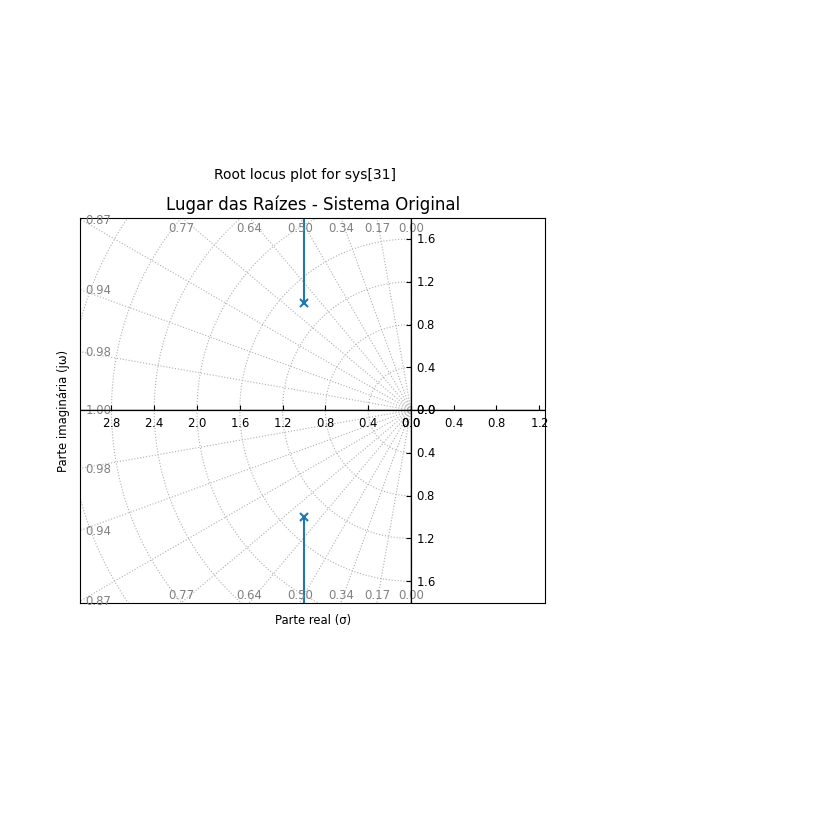

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


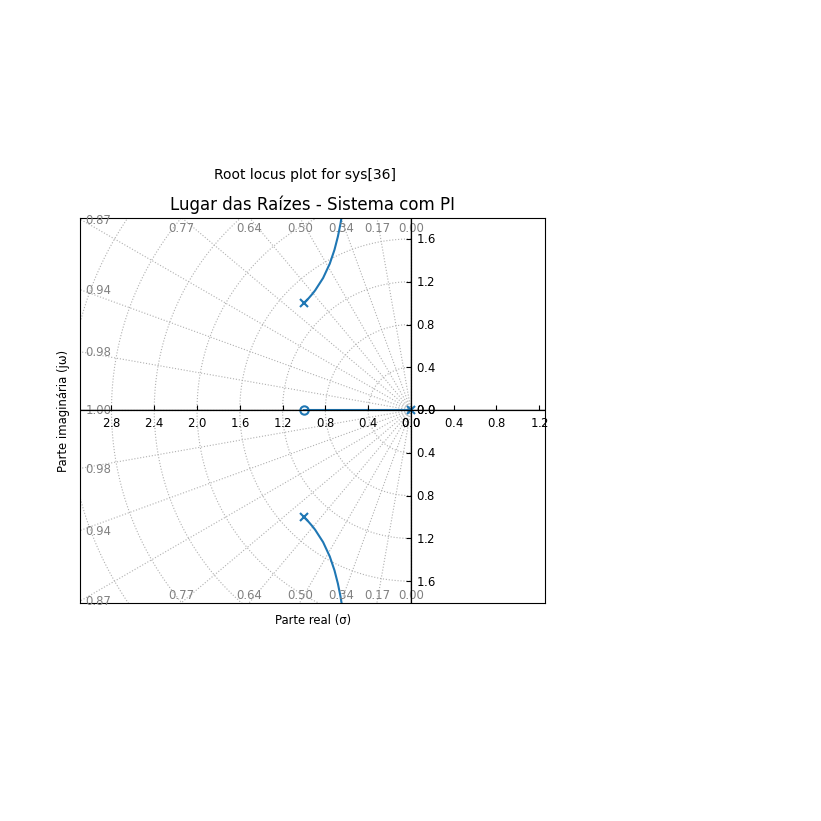

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


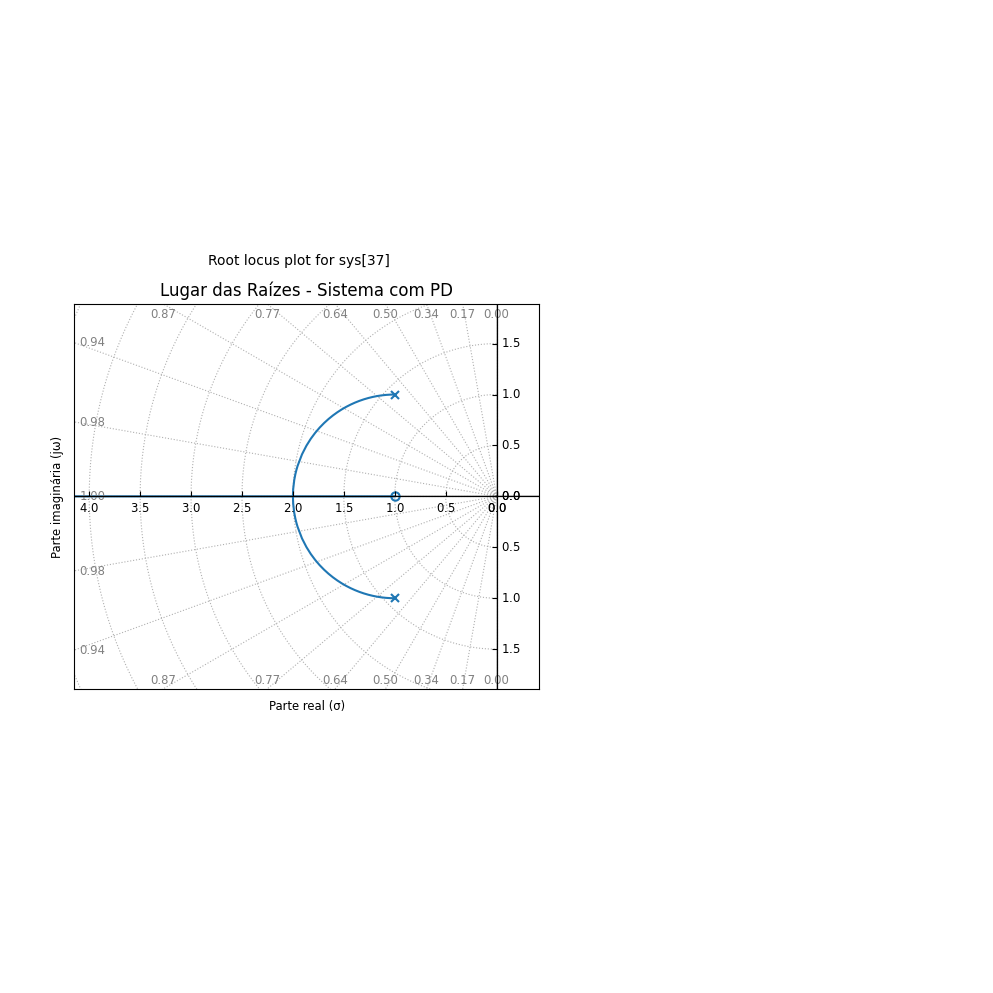

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


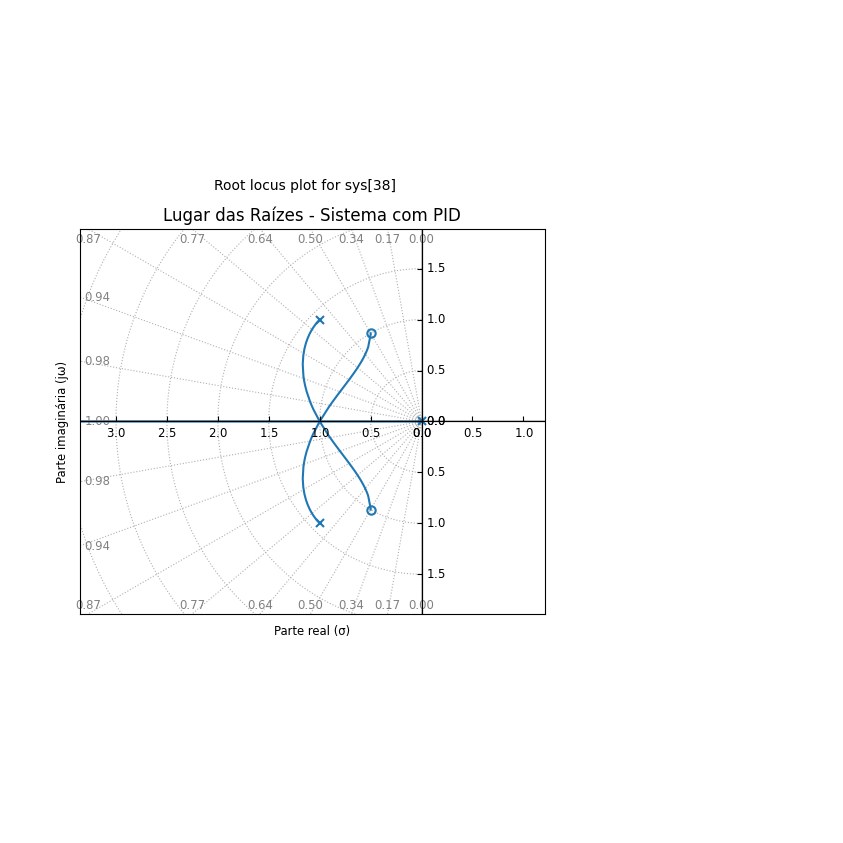

In [10]:
import matplotlib.pyplot as plt
import control as ctl

# Sistema de exemplo
G = ctl.TransferFunction([1], [1, 2, 2])

# Controladores
C_P  = ctl.TransferFunction([1], [1])          # P = 1
C_PI = ctl.TransferFunction([1, 1], [1, 0])    # PI = (s+1)/s
C_PD = ctl.TransferFunction([1, 1], [1])       # PD = s+1
C_PID = ctl.TransferFunction([1, 1, 1], [1, 0])# PID = (s^2+s+1)/s

# Malha aberta
L0   = G
L_PI = C_PI * G
L_PD = C_PD * G
L_PID = C_PID * G

# --- 1. Sistema original ---
plt.figure(figsize=(6,5))
ctl.rlocus(L0)
plt.axhline(0, color='black', linewidth=0.8)
plt.axvline(0, color='black', linewidth=0.8)
plt.title("Lugar das Ra√≠zes - Sistema Original")
plt.xlabel("Parte real (œÉ)")
plt.ylabel("Parte imagin√°ria (jœâ)")
plt.grid(True)

# --- 2. Com PI ---
plt.figure(figsize=(6,5))
ctl.rlocus(L_PI)
plt.axhline(0, color='black', linewidth=0.8)
plt.axvline(0, color='black', linewidth=0.8)
plt.title("Lugar das Ra√≠zes - Sistema com PI")
plt.xlabel("Parte real (œÉ)")
plt.ylabel("Parte imagin√°ria (jœâ)")
plt.grid(True)

# --- 3. Com PD ---
plt.figure(figsize=(6,5))
ctl.rlocus(L_PD)
plt.axhline(0, color='black', linewidth=0.8)
plt.axvline(0, color='black', linewidth=0.8)
plt.title("Lugar das Ra√≠zes - Sistema com PD")
plt.xlabel("Parte real (œÉ)")
plt.ylabel("Parte imagin√°ria (jœâ)")
plt.grid(True)

# --- 4. Com PID ---
plt.figure(figsize=(6,5))
ctl.rlocus(L_PID)
plt.axhline(0, color='black', linewidth=0.8)
plt.axvline(0, color='black', linewidth=0.8)
plt.title("Lugar das Ra√≠zes - Sistema com PID")
plt.xlabel("Parte real (œÉ)")
plt.ylabel("Parte imagin√°ria (jœâ)")
plt.grid(True)

plt.show()
